# Long-term VLM calculation
***code prepared by Alessio Rovere, MARUM, University of Bremen, DE. Contact: arovere@marum.de<br>
Date: 27/02/2020***

This simple script calculates long-term vertical land motion (VLM) rates from four inputs: 

1. An eustatic sea level (ESL) estimate for a given time period (interval, with max-min)
2. The time interval (Time) (interval, max-min)
3. GIA corrections for the same time period (mean and standard deviation)
4. Observed Relative sea level (RSL) for the same period (mean and standard deviation)

With these inputs, the script calculates long-term uplift rates with the following rationale:

1. The ESL estimate and Time are sampled uniformly, with no assumptions on their probability distribution
2. GIA and RSL are sampled as normally distributed
3. The calculation of the rate is iterated 1.000.000 times with the formula (RSL − GIA − ESL)/Time
4. A histogram plot is provided with percentile bounds

## General comments
Considering ESL and Time as uniformly distributed is not optimal. Please suggest improvements and bugs to arovere@marum.de

## Inputs
The input data used un the example is derived from Hearty et al., 2020 (https://doi.org/10.1029/2019PA003835). This script is referenced in the discussions of the paper.

In [1]:
#Inputs (change here)

#Max and min ESL [m]
ESLmin=10.6
ESLmax=28.3

#GIA [m]
muGIA=-3.6
sdGIA=1.2

#RSL [m]
muRSL=35.1
sdRSL=2.2

#Time [Ma]
maxTime=4.87
minTime=4.28

In [2]:
# Calculations
import numpy as np
import random

Rate=[]
val = np.linspace(0, 1000000, num=1000001)

#Creates a matrix randomly sampling the inputs
for x in val:
 ESL=random.uniform(ESLmin, ESLmax)
 Time=random.uniform(maxTime, minTime)
 RSL=np.random.normal(muRSL, sdRSL, 1)
 GIA=np.random.normal(muGIA, sdGIA, 1)
 Rate.append((RSL-GIA-ESL)/Time)

,10th,33rd,50th,66th,90th
Rate (m/Ma),2.6,3.5,4.2,4.8,5.9


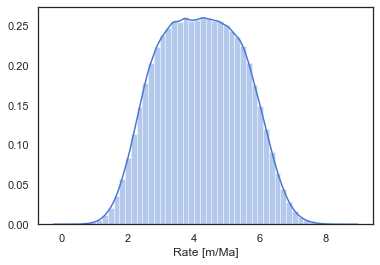

In [3]:
#Plots

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
ax = sns.distplot(Rate)
ax.set(xlabel='Rate [m/Ma]')

import pandas as pd
Perc = [(np.percentile(Rate,10)),(np.percentile(Rate,33)),(np.percentile(Rate, 50)),(np.percentile(Rate, 66)),(np.percentile(Rate, 90))]
Perc_Rate = pd.DataFrame(Perc, index = ['10th' , '33rd', '50th','66th' , '90th'], columns=['Rate (m/Ma)'])
Perc_Rate=Perc_Rate.round(1).T
Perc_Rate

***
## License
This software is relased under the MIT license.

Copyright 2020 Alessio Rovere

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
***
# Research funding acknowledgments
This script was created in the framework of the European Reasearch Council Starting Grant WARMCOASTS (Grant Agreement Number 802414), funded under the European Union's Horizon 2020 research and Innovation programme.
***
# How to cite
<a href="https://zenodo.org/badge/latestdoi/243504113"><img align="left" src="https://zenodo.org/badge/243504113.svg" alt="DOI"></a>
<br>